**Homework (Task 2)**

*Part a)*

In [1]:
# Import needed modules and the rk4 library
import numpy as np
import matplotlib.pyplot as plt
import rk4

In [2]:
# Define masses
m1 = 1
m2 = 1
m3 = 1
# Set stepsize and number of steps
h = 0.005
n = 400
# Set initial conditions
x0 = 0
y0 = np.array([-0.97000436,0.24308753,-0.46620368,-0.43236573,0.97000436,-0.24308753,
               -0.46620368,-0.43236573,0.0,0.0,0.93240737,0.86473146])
# Define derivation function for RK
def f(y, x):
    # New array that will be filled with derivatives from the old one
    y1 = np.empty(12)
    # Fill array/12-dim vector according to the definition on the sheet
    # Differential equations for the 3 body problem were split and G was set to 1
    y1[0] = y[2]
    y1[1] = y[3]
    y1[2] = (m2/np.sqrt((y[0]-y[4])**2 + (y[1]-y[5])**2)**3 * (y[4]-y[0]) + 
            m3/np.sqrt((y[0]-y[8])**2 + (y[1]-y[9])**2)**3 * (y[8]-y[0]))
    y1[3] = (m2/np.sqrt((y[0]-y[4])**2 + (y[1]-y[5])**2)**3 * (y[5]-y[1]) +
            m3/np.sqrt((y[0]-y[8])**2 + (y[1]-y[9])**2)**3 * (y[9]-y[1]))
    y1[4] = y[6]
    y1[5] = y[7]
    y1[6] = (m1/np.sqrt((y[0]-y[4])**2 + (y[1]-y[5])**2)**3 * (y[0]-y[4]) +
            m3/np.sqrt((y[4]-y[8])**2 + (y[5]-y[9])**2)**3 * (y[8]-y[4]))
    y1[7] = (m1/np.sqrt((y[0]-y[4])**2 + (y[1]-y[5])**2)**3 * (y[1]-y[5]) +
            m2*m3/np.sqrt((y[4]-y[8])**2 + (y[5]-y[9])**2)**3 * (y[9]-y[5]))
    y1[8] = y[10]
    y1[9] = y[11]
    y1[10] = (m1/np.sqrt((y[0]-y[8])**2 + (y[1]-y[9])**2)**3 * (y[0]-y[8]) +
            m2/np.sqrt((y[4]-y[8])**2 + (y[5]-y[9])**2)**3 * (y[4]-y[8]))
    y1[11] = (m1/np.sqrt((y[0]-y[8])**2 + (y[1]-y[9])**2)**3 * (y[1]-y[9]) +
            m2/np.sqrt((y[4]-y[8])**2 + (y[5]-y[9])**2)**3 * (y[5]-y[9]))
    return y1
# Run RK4 scheme
yn, xn = rk4.rk4(y0,x0,f,h,n)

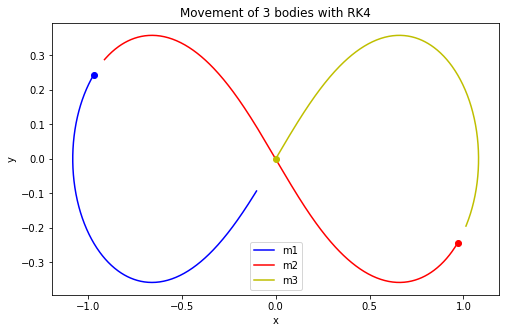

In [3]:
# Plot the results
plt.figure(figsize=(8,5))
plt.title("Movement of 3 bodies with RK4")
plt.plot(yn[0,0], yn[0,1], "o", color="b")
plt.plot(yn[:,0],yn[:,1], label="m1", color="b")
plt.plot(yn[0,4], yn[0,5], "o", color="r")
plt.plot(yn[:,4],yn[:,5], label="m2", color="r")
plt.plot(yn[0,8], yn[0,9], "o", color="y")
plt.plot(yn[:,8],yn[:,9], label="m3", color="y")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()